In [166]:
import numpy as np
import matplotlib.pyplot as plt

## Kinetic Ising Model simulation
Ising model with $N$ spins $\{-1,1\}$, cuplings matrix $J_{ij}$ and external field $h_i$. 

At each time step $\delta t$ each spin $s_i$ flips with a probability 
$$p_{flip} = \gamma \delta t \frac 1 2 [1-s_i(t)\tanh H_i(t)] \quad with \quad
H_i = h_i + \sum_j J_{ij}s_j(t)$$

In [167]:
class kinetic_ising:
    def __init__(self, N, J, h, gamma = 1):
        self.N = N
        self.J = J
        self.h = h
        self.S = np.ones(N)
        self.H_i = np.dot(self.J,self.S)+self.h
        self.gamma = gamma
        self.history = np.copy(self.S)
        
    def comp_H(self):
        self.H_i = np.dot(self.J,self.S)+self.h
    
    def store(self):
        self.history = np.vstack((self.history,self.S))
    
    def update(self,dt):
        p = np.random.rand(N)
        p_up = self.gamma*0.5*(1-self.S*np.tanh(self.H_i))
        #print(p_up)
        self.S[p < p_up] *= -1
        self.store()
        self.comp_H()
        
    def reset(self):
        self.S = np.ones(N)
        self.history = np.copy(self.S)

In [180]:
np.random.seed(123)
#number of spins
N = 30

#interactions matrix
mu = 0
sigma = 1
J = np.random.normal(mu,sigma,(N,N))

#external field
mu = -0.2
sigma = 0.1
h = np.random.normal(mu,sigma,N)

ising = kinetic_ising(N,J,h,gamma = 0.1)

In [181]:
ising.reset()
np.random.seed(123)

time = 1
steps = 150
dt = time / steps
for i in range(steps):
    ising.update(dt)


Text(0.5, 1.0, 'Spin evlolution in time. [$s_i=1$ yellow, $s_i=-1$ blue]')

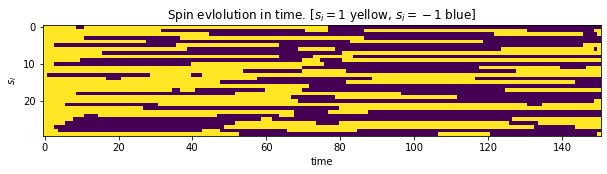

In [182]:
plt.figure(figsize=(10,3))
plt.imshow(ising.history.T)
plt.xlabel('time')
plt.ylabel(r'$s_i$')
plt.title(r'Spin evlolution in time. [$s_i=1$ yellow, $s_i=-1$ blue]')